# Group 32 Project Report

### Carol Dong, Aria Donthineni, Grace Ellis, Nao Kawano

In [1]:
#importing libaries 
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
#loading and adding colnames to data 

heart_diseases<- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                         col_names= c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                                      "exang", "oldpeak", "slope", "ca", "thal", "num"))
head(heart_diseases)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
#adding diagnosis column and changing column types 

heart<- heart_diseases |> 
    mutate(diagnosis = ifelse (is.na(num), NA, (num>0))) |>
    mutate(sex= as_factor(sex), cp= as_factor(cp), fbs= as_factor(fbs), 
           restecg= as_factor(restecg), exang= as_factor(exang), 
           slope= as_factor(slope), thal= as_factor(slope), num=as_factor(num),
            diagnosis= as_factor(diagnosis))
head(heart)


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,3,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3.0,2,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,2,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,1,0,FALSE


In [4]:
#splitting data into training and testing dataframes 
set.seed(1) 

heart_split<- initial_split(heart, prop= 0.75, strata= num)
heart_training<- training(heart_split)
heart_test<- testing(heart_split)

head(heart_training)


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0.0,2,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0.0,1,0,FALSE
49,1,2,130,266,0,0,171,0,0.6,1,0.0,1,0,FALSE
64,1,1,110,211,0,2,144,1,1.8,2,0.0,2,0,FALSE


In [5]:
#summarizing our data 

heart_summary<- heart_training |>
    group_by(diagnosis) |>
    summarize(mean_age= mean(age), min_age= min(age), max_age= max(age),
              mean_resting_bp= mean(thalach), min_resting_bp = min(thalach), max_resting_bp= max(thalach),
              mean_hr= mean(trestbps), min_hr = min(trestbps), max_hr= max(trestbps),
              number_patients= n())
heart_summary

diagnosis,mean_age,min_age,max_age,mean_resting_bp,min_resting_bp,max_resting_bp,mean_hr,min_hr,max_hr,number_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,52.68548,29,76,158.9194,105,202,129.7339,94,180,124
TRUE,56.48039,35,77,138.4118,71,195,133.9020,100,192,102


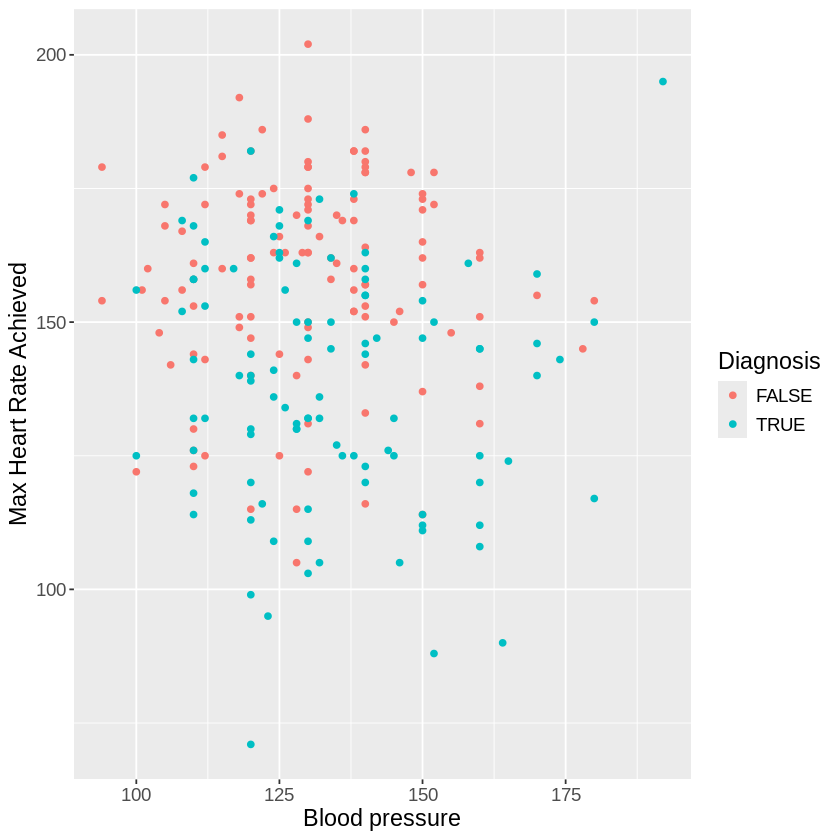

In [6]:
#creating our visualization 

options(repr.plot.height= 7, repr.plot.width=7)

heart_plot<- ggplot(heart_training, aes(x=trestbps, y=thalach)) +
    geom_point(aes(color=diagnosis))+
    labs(x="Blood pressure", y="Max Heart Rate Achieved", color= "Diagnosis") +
    theme(text = element_text(size = 14))
heart_plot

In [7]:
set.seed(1)

#standardizing data 
heart_recipe<- recipe(diagnosis~ trestbps + thalach, data=heart_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) 

#adding k-engine specifications 
heart_spec<- nearest_neighbor(weight_func= "rectangular", neighbors= tune()) |>
    set_engine("kknn") |>
    set_mode("classification") 

#creating cross-validation 
heart_vfold<- vfold_cv(heart_training, v=5, strata= diagnosis)

gridvals<- tibble(neighbors= seq(from=1, to=100))

#creating workflow and collecting metrics

knn_fit <- workflow() |>
                  add_recipe(heart_recipe) |>
                  add_model(heart_spec) |>
                  tune_grid(resamples = heart_vfold, grid = gridvals) |>
                  collect_metrics() |> 
                  filter(.metric == "accuracy") |>
                  select(neighbors, mean) |>
                  arrange(desc(mean))
head(knn_fit)

neighbors,mean
<int>,<dbl>
63,0.7077470
46,0.7076504
61,0.7076504
62,0.7076504
27,0.7075538
28,0.7075538


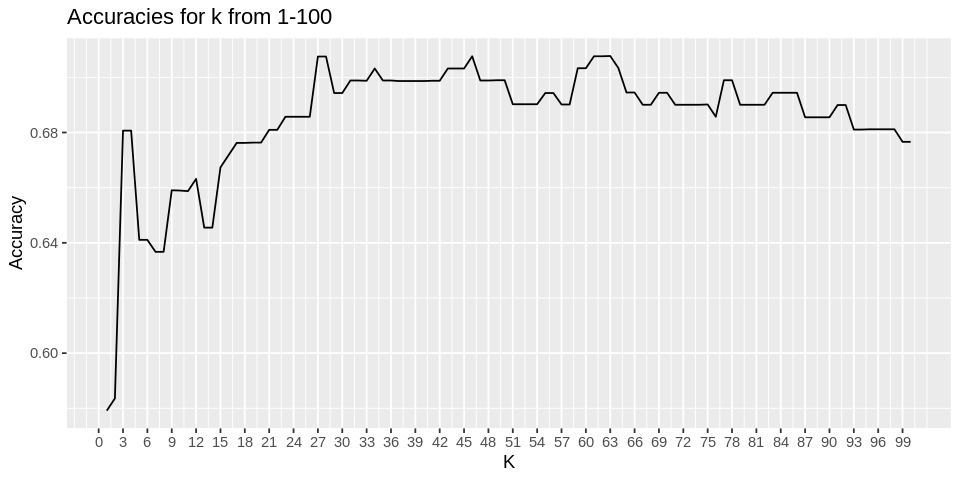

In [13]:
#visualizing neighbors 

options(repr.plot.width= 8, repr.plot.height= 4)
k_plot<- ggplot(knn_fit, aes(x=neighbors, y=mean)) +
    geom_line() + 
    scale_x_continuous(breaks = seq(0, 100, by = 3)) +
    labs(x= "K", y= "Accuracy") +
    ggtitle("Accuracies for k from 1-100")
k_plot

#k=46

In [15]:
#testing majority classifer 
heart_prop<- heart_training |>
    group_by(diagnosis) |>
    summarize(amount=n()) |>
    mutate(percent = 100*amount/nrow(heart_training))

heart_prop

diagnosis,amount,percent
<fct>,<int>,<dbl>
FALSE,124,54.86726
TRUE,102,45.13274


In [17]:
#building final model 

set.seed(1) 

final_spec<- nearest_neighbor(weight_func= "rectangular", neighbors= 46) |>
    set_engine("kknn") |>
    set_mode("classification") 

final_fit<- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(final_spec) |>
    fit(heart_training)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(46,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3097345
Best kernel: rectangular
Best k: 46